In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (cross_val_score, GridSearchCV,StratifiedKFold, RepeatedStratifiedKFold)
from sklearn.metrics import (accuracy_score, average_precision_score,roc_auc_score, make_scorer)
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm

In [71]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
url = "https://docs.google.com/spreadsheets/d/1a6PZi1oMqIQJP5f9MVtYRpdPG8dbWP9cD0mCRNsTEYw/gviz/tq?tqx=out:csv"
df = pd.read_csv(url)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


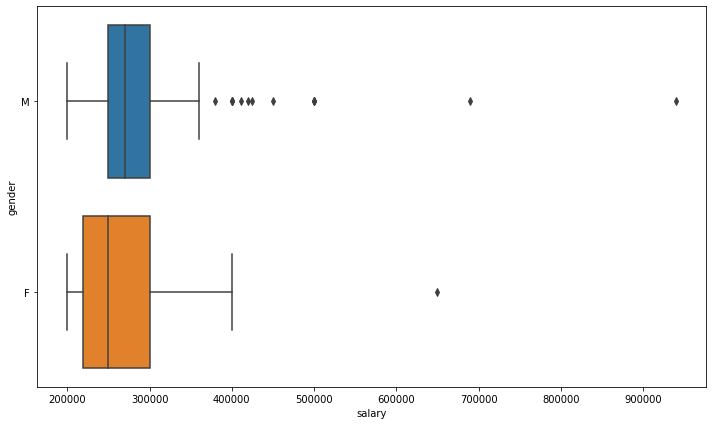

In [5]:
plt.figure(figsize =(12,7))
sns.boxplot("salary", "gender", data=df)
plt.show()

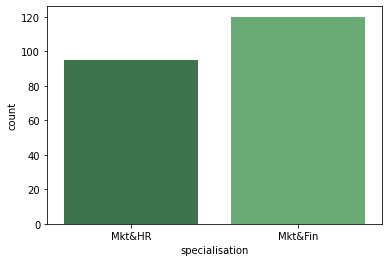

In [6]:
 sns.countplot(x="specialisation",
 data=df,
 palette="Greens_d")

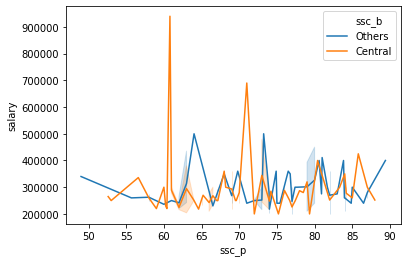

In [7]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=df)
plt.show()

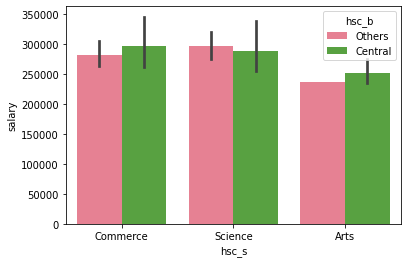

In [8]:
 sns.set_palette("husl",3) 
 sns.barplot(x="hsc_s", 
 y="salary", 
 hue="hsc_b", 
 data=df)

##Data Pre-processing

In [0]:
df.drop(['ssc_b','hsc_b'], axis=1, inplace=True)

##Feature Encoding

In [10]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [0]:
df["gender"] = df.gender.map({"M":0,"F":1})
df["hsc_s"] = df.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
df["degree_t"] = df.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
df["workex"] = df.workex.map({"No":0, "Yes":1})
df["status"] = df.status.map({"Not Placed":0, "Placed":1})
df["specialisation"] = df.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [0]:
X = df[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = df['status']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##Decision Tree

In [0]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.7846153846153846

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        20
           1       0.80      0.91      0.85        45

    accuracy                           0.78        65
   macro avg       0.76      0.71      0.72        65
weighted avg       0.78      0.78      0.77        65



##Random Forest

In [0]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.8461538461538461

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        20
           1       0.84      0.96      0.90        45

    accuracy                           0.85        65
   macro avg       0.85      0.78      0.80        65
weighted avg       0.85      0.85      0.84        65



In [0]:
p = make_pipeline(StandardScaler(),
RandomForestClassifier())

In [0]:
cv = RepeatedStratifiedKFold(n_splits=3,
n_repeats=5,
random_state=42)

In [27]:
param_grid = dict(randomforestclassifier__n_estimators=range(5, 50, 5))
param_grid

{'randomforestclassifier__n_estimators': range(5, 50, 5)}

In [28]:
scoring = {'Accuracy': make_scorer(accuracy_score)}
grid_search = GridSearchCV(p, param_grid=param_grid, cv=cv, scoring=scoring,refit='Accuracy',return_train_score=True)
grid_search.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=3, random_state=42),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='...
                             

In [0]:
results = grid_search.cv_results_

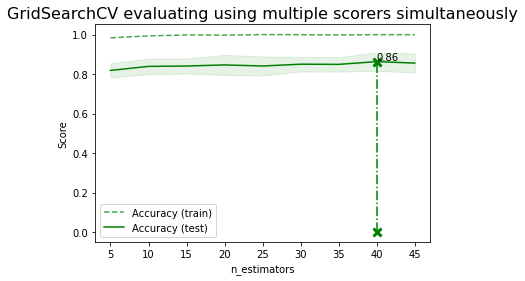

In [30]:
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
fontsize=16)
plt.xlabel("n_estimators")
plt.ylabel("Score")
ax = plt.gca()
X_axis = np.array(results['param_randomforestclassifier__n_estimators'].data,dtype=float)
for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
         sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
         sample_score_std = results['std_%s_%s' % (sample, scorer)]
         ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                 sample_score_mean + sample_score_std,
                 alpha=0.1 if sample == 'test' else 0, color=color)
         ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))
    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
           linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)
    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
          (X_axis[best_index], best_score + 0.005))
plt.legend(loc="best")
plt.grid(False)
plt.show()

##One Hot Encoding

In [32]:
X = df[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = df['status']
#Reverse Mapping and making Categorical
X["gender"] = pd.Categorical(X.gender.map({0:"M",1:"F"}))
X["hsc_s"] = pd.Categorical(X.hsc_s.map({0:"Commerce",1:"Science",2:"Arts"}))
X["degree_t"] = pd.Categorical(X.degree_t.map({0:"Comm&Mgmt",1:"Sci&Tech",2:"Others"}))
X["workex"] = pd.Categorical(X.workex.map({0:"No",1:"Yes"}))
X["specialisation"] = pd.Categorical(X.specialisation.map({0:"Mkt&HR",1:"Mkt&Fin"}))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [0]:
X = pd.get_dummies(X)
colmunn_names = X.columns.to_list()

In [0]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

##Logistic Regression

In [0]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred)

0.8307692307692308

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.62      0.70        21
           1       0.84      0.93      0.88        44

    accuracy                           0.83        65
   macro avg       0.82      0.78      0.79        65
weighted avg       0.83      0.83      0.82        65



## Improve the Model
The GLM solver uses a special variant of Newton’s method known as iteratively reweighted least squares (IRLS), which will be further desribed in the lecture on multivarite and constrained optimizaiton.

In [53]:
model = sm.GLM.from_formula('status~gender+ssc_p+hsc_p+hsc_s+degree_p+degree_t+workex+etest_p+specialisation+mba_p',
                            data=df, family=sm.families.Binomial())
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                  215
Model:                            GLM   Df Residuals:                      204
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -51.244
Date:                Sat, 09 May 2020   Deviance:                       102.49
Time:                        22:34:46   Pearson chi2:                     117.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -16.8486      4.588     -3.673      0.000     -25.840      -7.857
gender            -1.0161      0.607     -1.673      0.094      -2.206       0.174
ssc_p              0.2179      0.041      5.326      0.000       0.138       0.298
hsc_p              0.1102      0.036      3.071      0.002       0.040       0.181
hsc_s              0.7225      0.536      1.349      0.177      -0.327       1.772
degree_p           0.1588      0.051      3.120      0.002       0.059       0.259
degree_t          -1.2140      0.561     -2.164      0.030      -2.313      -0.115
workex             2.2042      0.702      3.138      0.002       0.828       3.581
etest_p           -0.0111      0.021     -0.526      0.599      -0.052       0.030
specialisation     0.3723      0.532      0.700      0.484      -0.670       1.415
mba_p             -0.2148      0.056     -3.827      0.000      -0.325      -0.105
==================================================================================
"""

##KNN

In [42]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [45]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11 10]
 [10 34]]


In [47]:
accuracy_score(y_test, y_pred)

0.6923076923076923

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.52      0.52        21
           1       0.77      0.77      0.77        44

    accuracy                           0.69        65
   macro avg       0.65      0.65      0.65        65
weighted avg       0.69      0.69      0.69        65



##Hyperparameters Tuning

In [70]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 7


In [73]:
classifier1 = KNeighborsClassifier(n_neighbors = 7, p = 1)
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test)
accuracy_score(y_test, y_pred)

0.7538461538461538

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60        21
           1       0.80      0.84      0.82        44

    accuracy                           0.75        65
   macro avg       0.72      0.71      0.71        65
weighted avg       0.75      0.75      0.75        65

